Bitcoin's clock mimics a harmonic oscilator because it adjusts the mining difficulty to maintain a 
block mining time averaging 10 minutes.

To crudely simulate Bitcoin's clock as a quantum harmonic oscillator we shall follow the steps below:
1. Scrap/Pick bitcoin confirmation time data from - https://bitinfocharts.com/comparison/bitcoin-confirmationtime.html#3y
2. Put this data is a list of 2^n values where n is the number of qubits we shall use
3. Plot the histogram
4. Compare this to a plot of the wave function of an actual RLC circuit using Qiskit_Metal
5. Hopefully this might lead to insights on the pros of making an atomic clock for Bitcoin alone.


In [2]:
pip install qiskit_metal 

Note: you may need to restart the kernel to use updated packages.Collecting qiskit_metal



  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Student5\anaconda3\anaconda2\envs\QWorld_Summer_School\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Student5\\AppData\\Local\\Temp\\pip-install-f7mtlk4t\\gdspy_0aad81231704417a8fc607ffc58235e3\\setup.py'"'"'; __file__='"'"'C:\\Users\\Student5\\AppData\\Local\\Temp\\pip-install-f7mtlk4t\\gdspy_0aad81231704417a8fc607ffc58235e3\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Student5\AppData\Local\Temp\pip-wheel-c_a4vyad'
       cwd: C:\Users\Student5\AppData\Local\Temp\pip-install-f7mtlk4t\gdspy_0aad81231704417a8fc607ffc58235e3\
  Complete output (33 lines):
  running bdist_wheel
  running build
  running build_py
  creating b

  Using cached numpy-1.22.4-cp38-cp38-win_amd64.whl (14.8 MB)



    running build_py
    creating build
    creating build\lib.win-amd64-3.8
    creating build\lib.win-amd64-3.8\gdspy
    copying gdspy\curve.py -> build\lib.win-amd64-3.8\gdspy
    copying gdspy\gdsiiformat.py -> build\lib.win-amd64-3.8\gdspy
    copying gdspy\hobby.py -> build\lib.win-amd64-3.8\gdspy
    copying gdspy\label.py -> build\lib.win-amd64-3.8\gdspy
    copying gdspy\library.py -> build\lib.win-amd64-3.8\gdspy
    copying gdspy\operation.py -> build\lib.win-amd64-3.8\gdspy
    copying gdspy\path.py -> build\lib.win-amd64-3.8\gdspy
    copying gdspy\polygon.py -> build\lib.win-amd64-3.8\gdspy
    copying gdspy\viewer.py -> build\lib.win-amd64-3.8\gdspy
    copying gdspy\__init__.py -> build\lib.win-amd64-3.8\gdspy
    creating build\lib.win-amd64-3.8\gdspy\data
    copying gdspy\data\00.xbm -> build\lib.win-amd64-3.8\gdspy\data
    copying gdspy\data\01.xbm -> build\lib.win-amd64-3.8\gdspy\data
    copying gdspy\data\02.xbm -> build\lib.win-amd64-3.8\gdspy\data
    copyin

  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Running setup.py clean for gdspy
Failed to build gdspy
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.9.0
    Uninstalling Pygments-2.9.0:
      Successfully uninstalled Pygments-2.9.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.4
    Uninstalling colorama-0.4.4:
      Successfully uninstalled colorama-0.4.4
    Running setup.py install for gdspy: started
    Running setup.py install for gdspy: finished with status 'error'


Our list of clock times is  [8.727, 11.339, 8.521, 10.746, 10.588, 9.796, 11.077, 9.863]

80.65700000000001
[0.328936036941945, 0.3749439457053768, 0.32503060060547034, 0.36500800225808283, 0.3623146826734759, 0.3485004602043045, 0.3705868849203307, 0.34969021836344427]


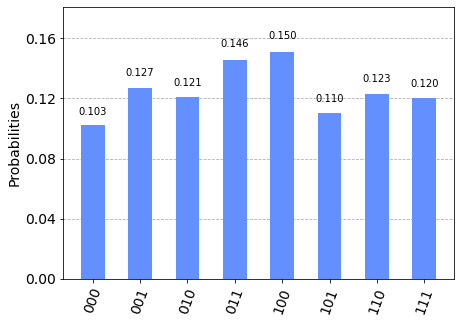

In [4]:
l = [8.727, 11.339, 8.521, 10.746, 10.588, 9.796, 11.077, 9.863]
print('Our list of clock times is ', l)
print()
a_sum = 0
norm = []
for i in range(8):
    a_sum += l[i]
print(a_sum)

for i in l:
    norm.append((i/a_sum)**0.5)
print(norm)
    
# then the set Norm will be the normalized set of 8 vector amplitudes

from qiskit import *
from qiskit.visualization import plot_histogram

qr = QuantumRegister(3,'qr')
cr = ClassicalRegister(3,'cr')
qc = QuantumCircuit(qr,cr)

qc.initialize(norm, qc.qubits)
qc.measure(qr,cr)

sim = Aer.get_backend('qasm_simulator')
job = execute(qc, sim, shots = 1024)
counts = job.result().get_counts()
plot_histogram(counts)

In [5]:
import qiskit_metal as metal
import matplotlib.pyplot as plt
import numpy as np
import math

ModuleNotFoundError: No module named 'qiskit_metal'

In [ ]:
from qiskit_metal.analyses.hamiltonian.HO_wavefunctions import wavefunction

In [ ]:
# Let's define the range of x-axis values (representating charge) to be from (-5,5)
x = np.linspace(-5,5,100)

# Let's plot the first five energy levels (N=0 through N=4) of the harmonic oscillator
# We'll just take L=C=1.0 for simplicity
plt.plot(x, wavefunction(1.0, 1.0, 0.0, x), 'k') # N=0; ground state (black)
plt.plot(x, wavefunction(1.0, 1.0, 1.0, x), 'b') # N=1; first excited state (blue)
plt.plot(x, wavefunction(1.0, 1.0, 2.0, x), 'r') # N=2; second excited state (red)
plt.plot(x, wavefunction(1.0, 1.0, 3.0, x), 'g') # N=3; third excited state (green)
plt.plot(x, wavefunction(1.0, 1.0, 4.0, x), 'y') # N=4; fourth excited state (yellow)
plt.xlabel("Charge [Q]")
plt.ylabel("Wavefunction [Psi]")

# show the plot
plt.show()